# WeRateDogs - Data Wrangling

*Andreina Tirado*

# Gather

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb

import requests
import tweepy
import json

import matplotlib.pyplot as plt

#### 1- "WeRateDogs" tweet archive

In this case, the history of tweets to be used for this analysis is given in a csv file, so the first step will be to import the file as dataframe

In [3]:
tweet_df = pd.read_csv('data/twitter-archive-enhanced.csv', sep=',')
tweet_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### 2- "WeRateDogs" images

As the second source of our analysis, there is information available in one of Udacity's endpint. In order to assess it, it's necessary to use the request library and then store the content response in a tsv file

In [6]:
#get image prediction file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
filename = 'data/image_predictions.tsv'
with open(filename, 'wb') as f:
        f.write(r.content)        

In [7]:
images = pd.read_csv('data/image_predictions.tsv', sep='\t')
images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


#### 3 "WeRateDogs" Retweets & Likes

The third and last source of data for this analysis is directly the twitter API, to gain acccess it was used the tweepy library. After reviewing the tweepy documentation the function used to query for retweets and likes was: api.get_status(tweet_id,tweet_mode = 'extended'). Where tweet_id is a list from the file #1

In [6]:
tweet_ids = tweet_df['tweet_id'].unique()

In [7]:
#establish connection to twitters API to collect information about each tweet 
'''
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

'''

"\nconsumer_key = ''\nconsumer_secret = ''\naccess_token = ''\naccess_secret = ''\n\nauth = tweepy.OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)\n\n"

In [8]:
#retrieve total retweets and likes from twitter's API
'''
with open('data/tweet_json.txt', mode = 'w') as file:
    for tweet_id in tweet_ids:
        try:
            tweet_info = api.get_status(tweet_id,tweet_mode = 'extended')
            tweet_info = tweet_info._json
            file.write(str(tweet_info['id'])+','+str(tweet_info['retweet_count']) +','+str(tweet_info['favorite_count'])+'\n')
        except:
            print("ERROR Tweet not found {}".format(tweet_id))
            continue
    file.close()
'''

'\nwith open(\'tweet_json.txt\', mode = \'w\') as file:\n    for tweet_id in tweet_ids:\n        try:\n            tweet_info = api.get_status(tweet_id,tweet_mode = \'extended\')\n            tweet_info = tweet_info._json\n            file.write(str(tweet_info[\'id\'])+\',\'+str(tweet_info[\'retweet_count\']) +\',\'+str(tweet_info[\'favorite_count\'])+\'\n\')\n        except:\n            print("ERROR Tweet not found {}".format(tweet_id))\n            continue\n    file.close()\n'

At this point besides flagging tweets missing (not found) nothing additional will be done, because during the cleaning steps this will be solved.

In [9]:
cols = ['tweet_id', 'count_retweet', 'count_likes']
tweet_additional = pd.read_csv('data/tweet_json.txt', sep = ',', header = None, names = cols, skip_blank_lines = True )
tweet_additional.tail()

,tweet_id,count_retweet,count_likes
2334,666049248165822465,42,105
2335,666044226329800704,136,290
2336,666033412701032449,43,121
2337,666029285002620928,46,125
2338,666020888022790149,496,2515


# Assess

Assessing this data will require both visual and programmatic efforts, this means that each of the dataframes will be carefully review in order to decide on the next cleaning steps.

In [10]:
tweet_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


#### Retweets
Given that one of our requirements is to work with original tweets and **NOT** retweets (RTs), let's identify how many tweets are RT's

In [11]:
tweet_df[tweet_df.text.str.contains("^RT") == True]['tweet_id'].count()

183

In [12]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### Ratings (Numerator and denominator)

In this case, after visual assessment it seems like most of the tweets have a score whose numerator seems to be a integer number and denominator is 10, so let's get a better idea of how many differ from those characteristics. 

*Denominators != 10*

In [13]:
tweet_df.query('rating_denominator != 10')['rating_denominator'].value_counts()

50     3
11     3
20     2
80     2
90     1
40     1
130    1
2      1
70     1
7      1
110    1
170    1
120    1
15     1
16     1
150    1
0      1
Name: rating_denominator, dtype: int64

In [14]:
tweet_df[(tweet_df['rating_denominator']== 120) | (tweet_df['rating_denominator']== 0 )]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
1779,677716515794329600,NaN,NaN,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677716515...,144,120,None,None,None,None,None


In [15]:
score = tweet_df.text.str.extract('((?:\d+\.)?\d+)\/(?:\d+)', expand=True)
score

,0
0,13
1,13
2,12
3,13
4,12
5,13
6,13
7,13
8,13
9,14


In [16]:
#420 
tweet_df[tweet_df['text'].str.contains('420|11.26|1776') == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,194351775.0,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670842764...,420,10,None,None,None,None,None


In the denominators case, there are some false positives (/120) especially if there are multiple dogs in the picture, but still given the low number of tweets affected by this and given that this is not the focus of the investigation, we'll flag this cases for deletion.

In the numerators case, we'll update the column with the correct values

#### Names

Each tweet usually contains the name, so could we have cases where the tweet has an incorrect name or no name at all?

In [17]:
tweet_df.query('name == "a" or name == "an" or name == "the" or name == None or name == ""')['tweet_id'].count()

70

#### Dog Stage

Each puppy/dog is categorized by a stage, in this case this information is organized in 4 different columns so let's check if all dogs have a stage assigned

In [18]:
tweet_df.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1976
1,None,None,None,puppo,29
2,None,None,pupper,None,245
3,None,floofer,None,None,9
4,doggo,None,None,None,83
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,12
7,doggo,floofer,None,None,1


In [19]:
tweet_df.groupby('doggo')['doggo'].count()

doggo
None     2259
doggo      97
Name: doggo, dtype: int64

In [20]:
tweet_df.groupby('floofer')['floofer'].count()

floofer
None       2346
floofer      10
Name: floofer, dtype: int64

In [21]:
tweet_df.groupby('pupper')['pupper'].count()

pupper
None      2099
pupper     257
Name: pupper, dtype: int64

In [22]:
tweet_df.groupby('puppo')['puppo'].count()

puppo
None     2326
puppo      30
Name: puppo, dtype: int64

For the following 2 data sets, the same process will be followed: checking data types, missing information, untidy data, duplicated information, etc.

In [23]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
images[images['tweet_id'].duplicated() == True]['tweet_id'].count()

0

In [25]:
images[images['jpg_url'].duplicated() == True]['tweet_id'].count()

66

In [26]:
images[~images.jpg_url.str.contains("jpg$") == True]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
320,671789708968640512,https://pbs.twimg.com/tweet_video_thumb/CVKtH-...,1,dalmatian,0.114259,True,teddy,0.062275,False,steam_locomotive,0.049700,False
815,692752401762250755,https://pbs.twimg.com/tweet_video_thumb/CZ0mhd...,1,Samoyed,0.471276,True,Siberian_husky,0.158850,True,Eskimo_dog,0.138672,True


In [27]:
tweet_additional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
tweet_id         2339 non-null int64
count_retweet    2339 non-null int64
count_likes      2339 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


## Quality

##### `tweet_df` table

* unnecessary columns in the data set
* the timestamp column has the incorrect data type
* there is missing information in at least 5 columns NaN
* "None" instead of NaN is used to design null values in some of the columns
* there are RTs in the tweet list
* there are dogs that don't belong to any stage and are classified as None, some even have been incorrectly assigned more than one stage
* incorrect names --> https://twitter.com/dog_rates/status/666407126856765440
* retweeted_status_id incorrect data type
* incorrect numerators 
* incorrect denominators

##### `images` table

* Duplicated image URL for different tweets


## Tidiness
* create one table or column with dogs type
* group all tables into one

### Copying the files prior to cleaning

In [28]:
tweet_df_copy = tweet_df.copy()
tweet_additional_copy = tweet_additional.copy()
images_copy = images.copy()

# Clean

In order to start this process, let's start to solve the tidiness issues so that we focus in the quality issues directly in the final table. In the following steps we will follow the "Define - Code - Test" structure to describe the steps taken.
* Create one table with all observations from the 3 dataframes
* delete unnecessary columns
* Create 1 column for the doggos
* remove RTs
* changing data types

### Tidiness

**Define**

Merge the three tables  into one single table to fulfill tidiness principles. In this step, we will focus first of merging tweet_df and tweet_additional

**Code**

In [29]:
full_tweet = pd.merge(tweet_df, tweet_additional, how='left', on='tweet_id',left_index=False, indicator=False)
full_tweet.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,count_retweet,count_likes
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,8211.0,37666.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,6072.0,32354.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,4015.0,24373.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,8368.0,40971.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,9067.0,39182.0


**Test**

In [30]:
full_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
count_retweet                 23

**Define**

Merge tables full_tweet and images.

Part A

In order to fulfill this step, it's necessary to also group the image predictions data:
* Get the dog breed prediction with the highest confidence interval
* Get the prediction on whether the image belongs to a dog or not
* Get the confidence interval associated with the prediction

**Code**

In [31]:
breed = []
is_dog = []
ci = []

def process_image_pred (df):
    if df['p1_dog'] == True:
        breed.append(df['p1'])
        is_dog.append(True)
        ci.append(df['p1_conf'])
    elif df['p2_dog'] == True:
        breed.append(df['p2'])
        is_dog.append(True)
        ci.append(df['p2_conf'])
    elif df['p3_dog'] == True:
        breed.append(df['p3'])
        is_dog.append(True)
        ci.append(df['p3_conf'])
    else:
        breed.append(np.NaN)
        is_dog.append(False)
        ci.append(0)

images.apply(process_image_pred, axis=1)


0       None
1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
17      None
18      None
19      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
        ... 
2045    None
2046    None
2047    None
2048    None
2049    None
2050    None
2051    None
2052    None
2053    None
2054    None
2055    None
2056    None
2057    None
2058    None
2059    None
2060    None
2061    None
2062    None
2063    None
2064    None
2065    None
2066    None
2067    None
2068    None
2069    None
2070    None
2071    None
2072    None
2073    None
2074    None
Length: 2075, dtype: object

**Test**

In [32]:
images['breed'] = breed
images['is_dog'] = is_dog
images['conf_interval'] = ci

images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,is_dog,conf_interval
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,True,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,True,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,True,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,True,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,True,0.560311


**Define**

Merge tables full_tweet and images.

Part B

In this part we will complete the merge between full_tweet and images 

**Code**

In [33]:
full_tweet = pd.merge(full_tweet, images, how='left', on='tweet_id',left_index=False, indicator=False)
full_tweet.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,is_dog,conf_interval
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,bagel,0.085851,False,banana,0.076110,False,NaN,False,0.000000
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,Pekinese,0.090647,True,papillon,0.068957,True,Chihuahua,True,0.323581
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,malamute,0.078253,True,kelpie,0.031379,True,Chihuahua,True,0.716012
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,Labrador_retriever,True,0.168086
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,basset,True,0.555712


**Test**

In [34]:
full_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 33 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
count_retweet                 23

**Define**

Replace the "None" with "" and combine content of columns 'doggo', 'floofer', 'pupper', 'puppo' into one column.

**Code**

In [35]:
cols_to_remove = ['doggo', 'floofer', 'pupper', 'puppo']
for i in range (len(cols_to_remove)):
    full_tweet[cols_to_remove[i]].replace('None', "", inplace=True)

full_tweet['stage'] = full_tweet.doggo + full_tweet.floofer + full_tweet.pupper + full_tweet.puppo
full_tweet.loc[full_tweet.stage == 'doggopupper', 'stage'] = 'delete'
full_tweet.loc[full_tweet.stage == 'doggopuppo', 'stage'] = 'delete'
full_tweet.loc[full_tweet.stage == 'doggofloofer', 'stage'] = 'delete'

In [36]:
full_tweet = full_tweet[full_tweet['stage'] != 'delete']

**Test**

In [37]:
# verify the creation of the new column
full_tweet.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,is_dog,conf_interval,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,bagel,0.085851,False,banana,0.076110,False,NaN,False,0.000000,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Pekinese,0.090647,True,papillon,0.068957,True,Chihuahua,True,0.323581,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,malamute,0.078253,True,kelpie,0.031379,True,Chihuahua,True,0.716012,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,Labrador_retriever,True,0.168086,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,basset,True,0.555712,


In [38]:
full_tweet.groupby('stage')['stage'].count()

stage
           1976
doggo        83
floofer       9
pupper      245
puppo        29
Name: stage, dtype: int64

In [39]:
full_tweet.shape

(2342, 34)

### Quality

**Define**
* Remove unnecessary columns

**Code**

In [40]:
columns_to_drop = ['retweeted_status_timestamp','p1', 'p1_conf', 'p2', 'p2_conf', 'p3', 'p3_conf', 'p1_dog', 'p2_dog', 'p3_dog','doggo', 'floofer', 'pupper', 'puppo']

full_tweet.drop(columns_to_drop, axis = 1, inplace = True, errors = 'raise')

**Test**

In [41]:
full_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2342 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                    2342 non-null int64
in_reply_to_status_id       77 non-null float64
in_reply_to_user_id         77 non-null float64
timestamp                   2342 non-null object
source                      2342 non-null object
text                        2342 non-null object
retweeted_status_id         179 non-null float64
retweeted_status_user_id    179 non-null float64
expanded_urls               2283 non-null object
rating_numerator            2342 non-null int64
rating_denominator          2342 non-null int64
name                        2342 non-null object
count_retweet               2325 non-null float64
count_likes                 2325 non-null float64
jpg_url                     2062 non-null object
img_num                     2062 non-null float64
breed                       1739 non-null object
is_dog                      2062 non-null object
conf_interval

**Define**

* Fix incorrect data types

**Code**

In [42]:
full_tweet['timestamp'] = pd.to_datetime(full_tweet['timestamp'])
full_tweet['count_retweet'] = full_tweet['count_retweet'].fillna(0).astype(int)
full_tweet['count_likes'] = full_tweet['count_likes'].fillna(0).astype(int)
full_tweet['in_reply_to_status_id'] = full_tweet['in_reply_to_status_id'].fillna(0).astype(int)
full_tweet['in_reply_to_user_id'] = full_tweet['in_reply_to_user_id'].fillna(0).astype(int)
full_tweet['img_num'] = full_tweet['img_num'].fillna(0).astype(int)
full_tweet['stage'] = full_tweet['stage'].astype('category')


**Test**

In [43]:
full_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2342 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                    2342 non-null int64
in_reply_to_status_id       2342 non-null int64
in_reply_to_user_id         2342 non-null int64
timestamp                   2342 non-null datetime64[ns]
source                      2342 non-null object
text                        2342 non-null object
retweeted_status_id         179 non-null float64
retweeted_status_user_id    179 non-null float64
expanded_urls               2283 non-null object
rating_numerator            2342 non-null int64
rating_denominator          2342 non-null int64
name                        2342 non-null object
count_retweet               2342 non-null int64
count_likes                 2342 non-null int64
jpg_url                     2062 non-null object
img_num                     2342 non-null int64
breed                       1739 non-null object
is_dog                      2062 non-null object
conf_interv

**Define**

* Change None in the entire df and "" in stage to NaN 

**Code**

In [44]:
#name, stage
full_tweet.replace('None', pd.np.nan, inplace=True)
full_tweet['stage'].replace((''), pd.np.nan, inplace=True)

**Define**

* Remove RTs from the data set

**Code**

In [45]:
# 4 RTs in the tweet list
full_tweet.drop(full_tweet[full_tweet.text.str.contains("^RT") == True].index, axis = 0, inplace = True)

**Test**

(test for the previous 2 steps)

In [46]:
full_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2161 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                    2161 non-null int64
in_reply_to_status_id       2161 non-null int64
in_reply_to_user_id         2161 non-null int64
timestamp                   2161 non-null datetime64[ns]
source                      2161 non-null object
text                        2161 non-null object
retweeted_status_id         0 non-null float64
retweeted_status_user_id    0 non-null float64
expanded_urls               2103 non-null object
rating_numerator            2161 non-null int64
rating_denominator          2161 non-null int64
name                        1490 non-null object
count_retweet               2161 non-null int64
count_likes                 2161 non-null int64
jpg_url                     1982 non-null object
img_num                     2161 non-null int64
breed                       1675 non-null object
is_dog                      1982 non-null object
conf_interval  

**Define**

* Remove incorrect names from the column 'name'

**Code**

In [47]:
full_tweet['name'].value_counts()

a            55
Charlie      11
Lucy         11
Oliver       10
Cooper       10
Tucker        9
Penny         9
Lola          8
the           8
Winston       8
Sadie         8
Toby          7
Daisy         7
Bella         6
Koda          6
Oscar         6
an            6
Bailey        6
Bo            6
Stanley       6
Jax           6
Dave          5
Bentley       5
Louis         5
Buddy         5
Milo          5
Scout         5
Leo           5
Chester       5
Rusty         5
             ..
Akumi         1
Hazel         1
Sparky        1
Richie        1
Steve         1
Shelby        1
Zeek          1
Sprinkles     1
Beya          1
Burt          1
Angel         1
Laika         1
Stephanus     1
Cupid         1
Rinna         1
Striker       1
Rorie         1
Halo          1
Benny         1
Tedrick       1
Alejandro     1
Bruiser       1
Snickers      1
Georgie       1
Jazz          1
Willie        1
Rascal        1
Socks         1
Marty         1
Skittle       1
Name: name, Length: 952,

In [48]:
#Example --> https://twitter.com/dog_rates/status/666407126856765440
full_tweet.replace(('a','an','the'), pd.np.nan, inplace=True)

**Test**

In [49]:
full_tweet['name'].value_counts()

Charlie      11
Lucy         11
Oliver       10
Cooper       10
Penny         9
Tucker        9
Lola          8
Winston       8
Sadie         8
Toby          7
Daisy         7
Stanley       6
Bailey        6
Bella         6
Jax           6
Oscar         6
Koda          6
Bo            6
Bentley       5
Rusty         5
Louis         5
Chester       5
Leo           5
Milo          5
Dave          5
Scout         5
Buddy         5
Clarence      4
Brody         4
Alfie         4
             ..
Flash         1
Akumi         1
Hazel         1
Sparky        1
Steve         1
Zeek          1
Ralphus       1
Sprinkles     1
Jay           1
Beya          1
Angel         1
Laika         1
Stephanus     1
Cupid         1
Rinna         1
Striker       1
Rorie         1
Halo          1
Benny         1
Tedrick       1
Alejandro     1
Bruiser       1
Snickers      1
Georgie       1
Jazz          1
Willie        1
Rascal        1
Socks         1
Marty         1
Skittle       1
Name: name, Length: 949,

**Define**

* Get the tweet source in a separated column, rather than embedded in a HTML tag

**Code**

In [50]:
full_tweet['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2030
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          89
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [51]:
full_tweet['tw_source'] = full_tweet['source'].str.extract(r'^(?:.+>)([^\<\>]+)(?:<.+)$', expand=True)

**Test**

In [52]:
full_tweet['tw_source'].value_counts()

Twitter for iPhone     2030
Vine - Make a Scene      89
Twitter Web Client       31
TweetDeck                11
Name: tw_source, dtype: int64

**Define**

* Fix sintaxis and standarize dog breeds naming convention, convert to lower case and use "_" instead of "-"

**Code**

In [53]:
#### Dog Breed sintax inconsistencies ####
#curly-coated_retriever | black-and-tan_coonhound | Greater_Swiss_Mountain_dog

full_tweet['breed'].value_counts().sort_values()

Scotch_terrier                      1
Japanese_spaniel                    1
EntleBucher                         1
clumber                             1
Irish_wolfhound                     1
standard_schnauzer                  1
Bouvier_des_Flandres                1
silky_terrier                       1
Sussex_spaniel                      2
Appenzeller                         2
Australian_terrier                  2
wire-haired_fox_terrier             2
black-and-tan_coonhound             2
groenendael                         2
curly-coated_retriever              2
Brabancon_griffon                   3
komondor                            3
Irish_water_spaniel                 3
briard                              3
Greater_Swiss_Mountain_dog          3
Leonberg                            3
toy_terrier                         3
cairn                               3
Afghan_hound                        3
Welsh_springer_spaniel              4
Tibetan_terrier                     4
Saluki      

In [54]:
full_tweet['breed'] = full_tweet['breed'].str.lower()

In [55]:
full_tweet['breed'] = full_tweet['breed'].str.replace('-','_')

**Test**

In [56]:
full_tweet[full_tweet['breed'] == 'Greater_Swiss_Mountain_dog']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,expanded_urls,rating_numerator,...,name,count_retweet,count_likes,jpg_url,img_num,breed,is_dog,conf_interval,stage,tw_source


**Define**
 
* Rename columns to get better insights on the content

**Code**

In [57]:
full_tweet.rename(columns={'timestamp': 'tw_creation_date', 'source': 'tw_device_source','text': 'tw_text','stage': 'dog_stage','rating_numerator': 'numerator','rating_denominator': 'denominator'}, inplace=True)

**Test**

In [58]:

full_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2161 entries, 0 to 2355
Data columns (total 21 columns):
tweet_id                    2161 non-null int64
in_reply_to_status_id       2161 non-null int64
in_reply_to_user_id         2161 non-null int64
tw_creation_date            2161 non-null datetime64[ns]
tw_device_source            2161 non-null object
tw_text                     2161 non-null object
retweeted_status_id         0 non-null float64
retweeted_status_user_id    0 non-null float64
expanded_urls               2103 non-null object
numerator                   2161 non-null int64
denominator                 2161 non-null int64
name                        1421 non-null object
count_retweet               2161 non-null int64
count_likes                 2161 non-null int64
jpg_url                     1982 non-null object
img_num                     2161 non-null int64
breed                       1675 non-null object
is_dog                      1982 non-null object
conf_interval  

**Define**
 
* Fix content of column numerators to assign the full number not just the decimal part

**Code**

In [59]:
full_tweet['numerator'] = full_tweet['tw_text'].str.extract('((?:\d+\.)?\d+)\/(?:\d+)', expand=True)

**Test**

In [60]:
full_tweet['numerator'].value_counts()

12       493
10       440
11       424
13       305
9        156
8         98
7         53
14        43
5         33
6         32
3         19
4         17
2          9
1          8
0          2
420        2
182        1
60         1
84         1
143        1
960        1
666        1
99         1
1776       1
9.75       1
17         1
50         1
44         1
88         1
165        1
13.5       1
15         1
24         1
007        1
20         1
45         1
144        1
204        1
11.27      1
9.5        1
121        1
80         1
11.26      1
Name: numerator, dtype: int64

**Define**

Drop rows with denominators different than 10

**Code**

In [61]:
full_tweet = full_tweet[full_tweet['denominator'] == 10]

**Test**

In [62]:
full_tweet.query('denominator != 10')['denominator'].value_counts()

Series([], Name: denominator, dtype: int64)

In [63]:
#store as csv
full_tweet.to_csv('data/twitter_archive_master.csv', index = False)

## Analysis

Now after combining all of the data sources let's use this dataset to collect some insights about WeRateDogs, Dogs and its followers

### Most retweeted & liked Dog

In [64]:
full_tweet.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,denominator,count_retweet,count_likes,img_num,conf_interval
count,2.139000e+03,2.139000e+03,2.139000e+03,0.0,0.0,2139.0,2139.000000,2139.000000,2139.000000,1964.000000
mean,7.369882e+17,2.510338e+16,7.344802e+14,NaN,NaN,10.0,2591.993922,8452.450210,1.105189,0.463259
std,6.763658e+16,1.352566e+17,2.407313e+16,NaN,NaN,0.0,4620.441379,12454.585781,0.631765,0.339343
min,6.660209e+17,0.000000e+00,0.000000e+00,NaN,NaN,10.0,0.000000,0.000000,0.000000,0.000000
25%,6.766103e+17,0.000000e+00,0.000000e+00,NaN,NaN,10.0,558.500000,1779.500000,1.000000,0.137834
50%,7.094095e+17,0.000000e+00,0.000000e+00,NaN,NaN,10.0,1240.000000,3800.000000,1.000000,0.457514
75%,7.892914e+17,0.000000e+00,0.000000e+00,NaN,NaN,10.0,2971.500000,10564.500000,1.000000,0.772489
max,8.924206e+17,8.862664e+17,8.405479e+17,NaN,NaN,10.0,82727.000000,162612.000000,4.000000,0.999956


From the information above, we know that the highest number of tweets is **82727** and the highest number of likes is **162612**, so let's identify which dog(s) are the ones with such high numbers

In [65]:
#Get Max rewteet information
full_tweet.loc[full_tweet['count_retweet'].idxmax()]

tweet_id                                                   744234799360020481
in_reply_to_status_id                                                       0
in_reply_to_user_id                                                         0
tw_creation_date                                          2016-06-18 18:26:18
tw_device_source            <a href="http://twitter.com/download/iphone" r...
tw_text                     Here's a doggo realizing you can stand in a po...
retweeted_status_id                                                       NaN
retweeted_status_user_id                                                  NaN
expanded_urls               https://twitter.com/dog_rates/status/744234799...
numerator                                                                  13
denominator                                                                10
name                                                                      NaN
count_retweet                                                   

In [66]:
#Get Max likes information
full_tweet.loc[full_tweet['count_likes'].idxmax()]

tweet_id                                                   744234799360020481
in_reply_to_status_id                                                       0
in_reply_to_user_id                                                         0
tw_creation_date                                          2016-06-18 18:26:18
tw_device_source            <a href="http://twitter.com/download/iphone" r...
tw_text                     Here's a doggo realizing you can stand in a po...
retweeted_status_id                                                       NaN
retweeted_status_user_id                                                  NaN
expanded_urls               https://twitter.com/dog_rates/status/744234799...
numerator                                                                  13
denominator                                                                10
name                                                                      NaN
count_retweet                                                   

In both cases belongs to the same tweet, in this case the one with id 744234799360020481 that belongs to a "unnamed dog" labrador retriever, whose dog stage is **doggo**

#### Retweets vs Likes

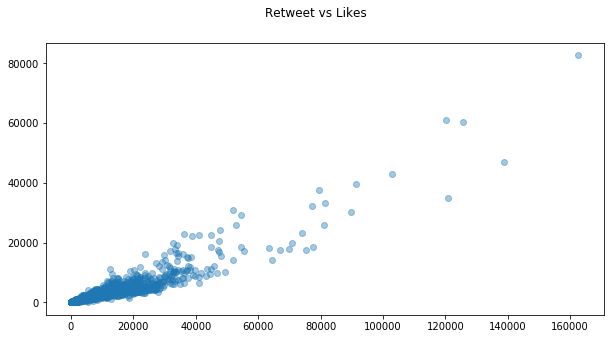

In [67]:
fig = plt.figure(figsize=(10,5))
fig.suptitle('Retweet vs Likes')
plt.scatter(data=full_tweet, y='count_retweet', x= 'count_likes', alpha = 0.4);

From before we could identify that the dog with the highest number of retweet was also the one with most likes, and according to this chart there is clearly a positive correlation between retweets and likes

### Most predicted Dog Breed

From the image prediction files, we got a list of potential predictions so what if we list the ones that are more recurrent

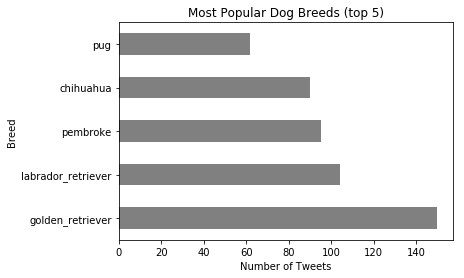

In [68]:
ax = full_tweet['breed'].value_counts().head().plot.barh(color = ['grey'])
ax.set_title('Top 5 Predicted Dog Breed')
ax.set_xlabel("Number of Tweets")
ax.set_ylabel("Breed")
ax.set_title("Most Popular Dog Breeds (top 5)");

plt.show()


In this case golden retrievers are the clear winners with more than 150 occurrences, the 2nd place belongs to labrador retrievers with a bit more than 100 matches.

### Image Predictions: Is that a dog?

In [69]:
#Total identified breeds
total_breeds = len(full_tweet['breed'].unique())+1

print("There are a total of {} breeds identified".format(total_breeds))

There are a total of 115 breeds identified


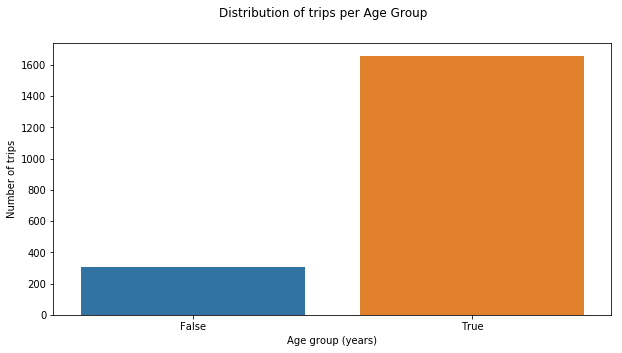

In [70]:
fig = plt.figure(figsize=(10,5))
fig.suptitle('Distribution of trips per Age Group')
sb.countplot(data=full_tweet, x='is_dog')
plt.ylabel('Number of trips')
plt.xlabel('Age group (years)');

Earlier we determined what was the most predicted breed, and based on the previous chart we know that more than 1000 tweets were identified a positive for having dogs and assigned a corresponding breed

### Most common dog stage

If you follow WeRateDogs, you know already that there is a stage (associated to the dog age) where each dog is placed. So let's see all the data to verify what is the most common stage among all:

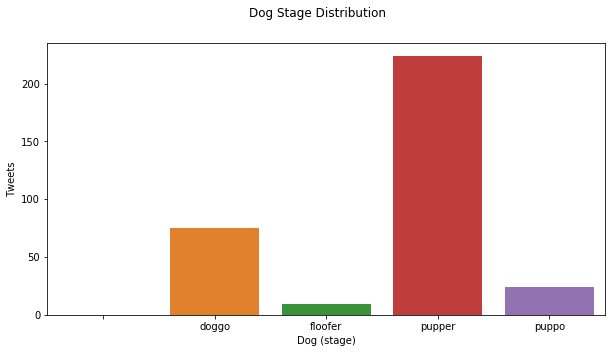

In [71]:
fig = plt.figure(figsize=(10,5))
fig.suptitle('Dog Stage Distribution')
sb.countplot(data=full_tweet, x='dog_stage')
plt.ylabel('Tweets')
plt.xlabel('Dog (stage)');

Puppers are the #1 stage in this data set

### Twitter Engagement: Mobile vs Desktop?

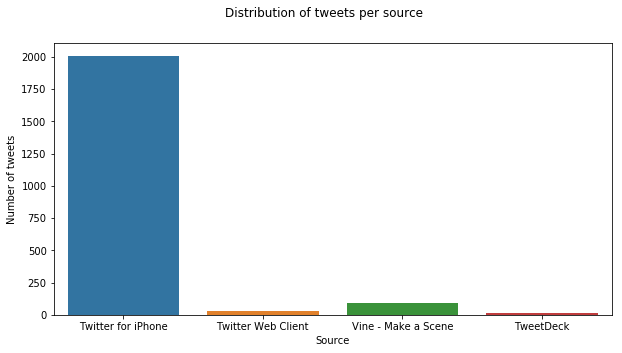

In [72]:
fig = plt.figure(figsize=(10,5))
fig.suptitle('Distribution of tweets per source')
sb.countplot(data=full_tweet, x='tw_source')
plt.ylabel('Number of tweets')
plt.xlabel('Source');

According to this observation mobile & iphone are the clear winners, of course we cannot state that a correlation exist between dog lovers and iphone owners, but at least most of the tweets in the analyzed data set were originated in an iphone

# References

* starkoverflow : how to merge multiples df in pandas, find substring, match regex
* pandas documentation
* udacity course